In [49]:
from evaluate_interpretability import *
import cebra

In [1]:
embedding_size = 64
rat = 'gatsby'

In [51]:
z_train = np.load(f"../final_embeddings/output_dimension_{embedding_size}_{rat}/train_embeddings.npy")
z_valid = np.load(f"../final_embeddings/output_dimension_{embedding_size}_{rat}/valid_embeddings.npy")

ds = cebra.datasets.hippocampus.SingleRatDataset(name=rat, root='../data', download=True)

labels = ds.continuous_index.numpy()
split_idx = int(0.8 * len(ds.neural))
position_train = labels[:split_idx, 0]
position_valid = labels[split_idx:, 0]

direction_train = np.argmax(labels[:split_idx, 1:], axis=1)
direction_valid = np.argmax(labels[split_idx:, 1:], axis=1)

neural_train = ds.neural[:split_idx].numpy()
neural_valid = ds.neural[split_idx:].numpy()

In [52]:
r2_train = compute_position_r2(z_train, position_train)
r2_valid = compute_position_r2(z_valid, position_valid)
print(f"Position R2 — train: {r2_train:.3f}, valid: {r2_valid:.3f}")

Position R2 — train: 0.547, valid: 0.579


In [53]:
acc_train = compute_direction_acc(z_train, direction_train)
acc_valid = compute_direction_acc(z_valid, direction_valid)
print(f"Direction acc — train: {acc_train:.3f}, valid: {acc_valid:.3f}")

Direction acc — train: 0.803, valid: 0.792


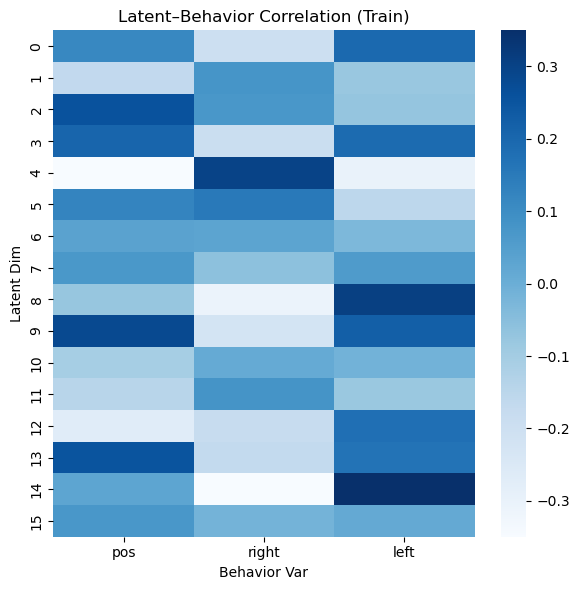

In [48]:
behavior_train = np.stack([position_train, direction_train == 1, direction_train == 0], axis=1)
corr = compute_behavior_corr(z_train, behavior_train)

plt.figure(figsize=(6, 6))
sns.heatmap(corr, cmap="Blues", xticklabels=["pos", "right", "left"])
plt.title("Latent–Behavior Correlation (Train)")
plt.xlabel("Behavior Var")
plt.ylabel("Latent Dim")
plt.tight_layout()
plt.show()

In [44]:
sparsity_percent = compute_sparsity(z_train)
print(f"Avg % active dims: {sparsity_percent:.1f}%")

Avg % active dims: 99.7%


/Users/arjun/anaconda3/envs/interpretable-neural-embeddings-env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/arjun/anaconda3/envs/interpretable-neural-embeddings-env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


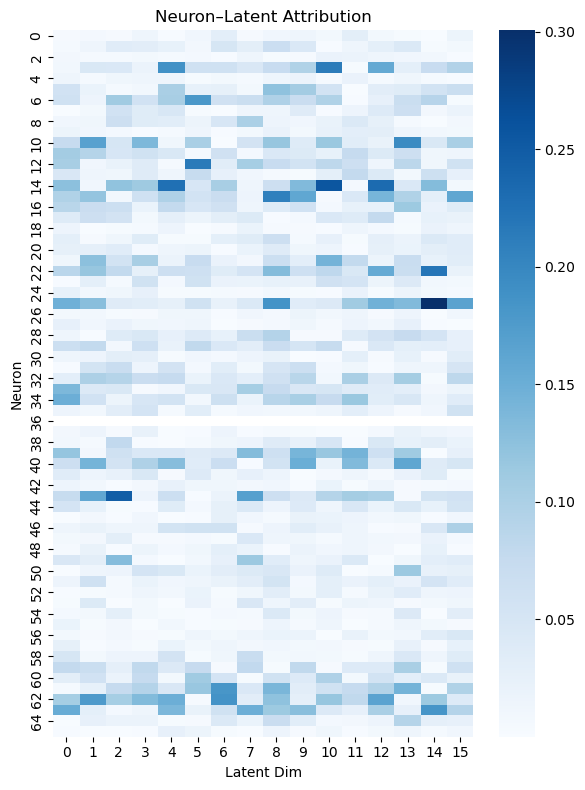

In [45]:
nl_corr = neuron_latent_attribution(neural_train, z_train)

plt.figure(figsize=(6, 8))
sns.heatmap(np.abs(nl_corr), cmap="Blues")
plt.title("Neuron–Latent Attribution")
plt.xlabel("Latent Dim")
plt.ylabel("Neuron")
plt.tight_layout()
plt.show()